In [ ]:
#importing libraries
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 


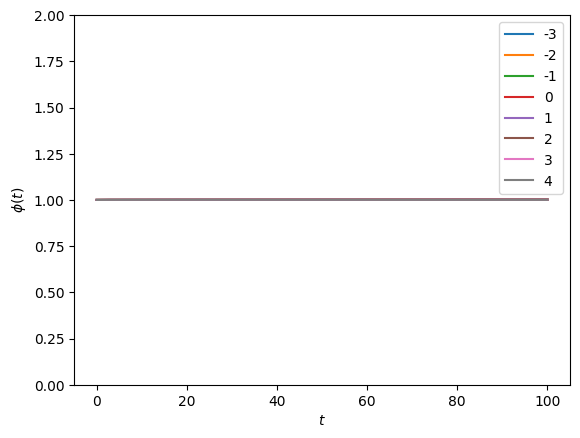

In [39]:


tf=100 #final time
#defning functions 
def a(n): #function for obtainin the scale factor plots
  #initial conditions for parameters 
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.99999999
  b = 1+alpha*(1-w*alpha/6)-m
  #defining system of differential equations for a and phi
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha] #initial conditons

# Time span to solve over
  t_span = [0, tf]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))

  # Plot the solution
  plt.plot(sol.t, sol.y[0], label=n)
#plt.plot(sol.t, sol.y[2], label='p\(t)')

  plt.xlabel('t')
  plt.ylabel('$a(t)$')

  plt.legend()
 
def p(n):  #function for obtainin the scalar field plots
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.99999999
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, tf]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))
  t=sol.t
  a = sol.y[0]
  an=10**(-3)*a #defining new variable
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  # Plot the solution
  plt.plot(t, p, label=n)
#plt.plot(sol.t, sol.y[2], label='p\(t)')

  plt.xlabel('$t$')
  plt.ylabel('$\phi(t)$')

  plt.ylim(0,2)
  plt.legend()

def o(n): #function for obtaining the density parameters
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.99999999
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, tf]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))

  t=sol.t
  a = sol.y[0]
  an=10**(-3)*a #defining new variable
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3) #matter density parameter
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1)) #scalar field density parameter
  wan = Omega_m + Omega_p
  one = Om_p + Om_m
  #plt.plot(sol.t, one)
  plt.plot(t, one, label=n)
  plt.xlabel('$t$')
  plt.ylabel('$\Omega_m (t)+ \Omega_{\phi}(t)$')
  plt.ylim(0, 2)
  plt.legend()



for i in range(-3,5):
  m=i*10**(-1)
  p(i)


  

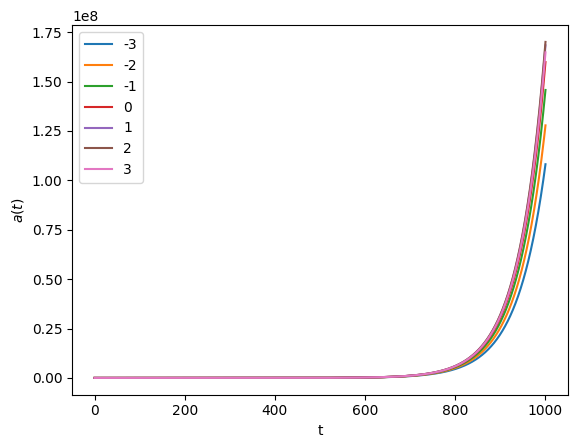

In [34]:

for i in range(-3,4):
  m=i*10**(-1)
  a(i)


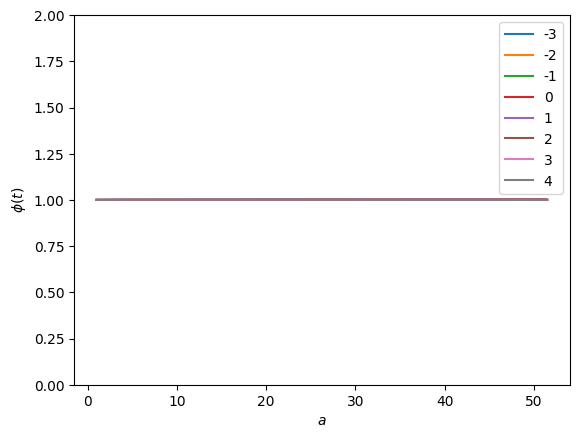

In [31]:


for i in range(-3,5):
  m=i*10**(-1)
  p(i)


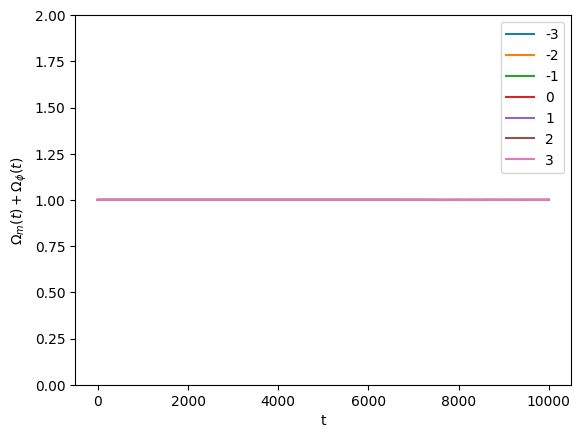

In [ ]:

for i in range(-3,4):
  m=i*10**(-1)
  o(i)

In [51]:
def om(n):
  w = 3000
  A = (2*w+2)/(3*w+4)
  B = 2/(3*w+4)
  alpha = B/A
  m =0.99999999
  b = 1+alpha*(1-w*alpha/6)-m
  def f(t, y):
    a,a_dot,p,p_dot = y
    return [
        a_dot,
        a*((-m)/(p*2)*((6+2*w)/(3+2*w))*a**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        #a*((-m)/(p*2)*((6+2*w)/(3+2*w))*an**(-3)+ 1/(a*p)*a_dot*p_dot - w/(3*p**2)*p_dot**2 + b*((3*(n-2))/(3+2*w)+1)*p**(n-1)),
        p_dot,
        (1./(2.*w + 3.))*(3.*(m)*a**(-3.) + 6.*b*(2. - n)*p**(n)) - (3./a)*a_dot*p_dot
        #(1./(2.*w + 3.))*(3.*(m)*an**(-3.) + 6.*b*(2. - n)*p**(n)) - 3./a*a_dot*p_dot
         ]
  y0 = [1, 1, 1, alpha]

# Time span to solve over
  t_span = [0, 100]

# Solve the differential equation using solve_ivp
  sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100000))

  t=sol.t
  a = sol.y[0]
  an=10**(-3)*a #defining new variable
  adot = sol.y[1]
  p = sol.y[2]
  pdot = sol.y[3]
  H= adot/a
  H2 = (m*a**(-3)/p - pdot*adot*1/(a*p) + w/(6*p**2)*pdot**2 + b*p**(n-1))
  Omega_m = (1/(p*H2))*(m)*a**(-3)
  Om_m = 1/p*(m)*a**(-3)*1/(H**2)
  Om_p = (1/H**2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  Omega_p = (1/H2)*(w*pdot**2/(6*p**2)-adot*pdot*1/(a*p)+b*p**(n-1))
  an = 0.05*a
  plt.plot(an, Om_m, label = n)
  plt.plot(an, Om_p )
  plt.xlabel('$a$')
  plt.legend()
  ain =a[46000:47500]
  Omin  = Om_m[46000:47500]
  Opin = Om_p[46000:47500]
  interp_func = interp1d(ain, Omin) 
  interp_funcp = interp1d(ain, Opin)  
  print("Value of Om_m at for p = ",n ,"is", interp_func(20.0))
  print("Value of Om_p at for p = ",n ,"is", interp_funcp(20.0))

 
  
 




Value of Om_m at for p =  7 is 0.30942333652864096
Value of Om_p at for p =  7 is 0.6905878264850384


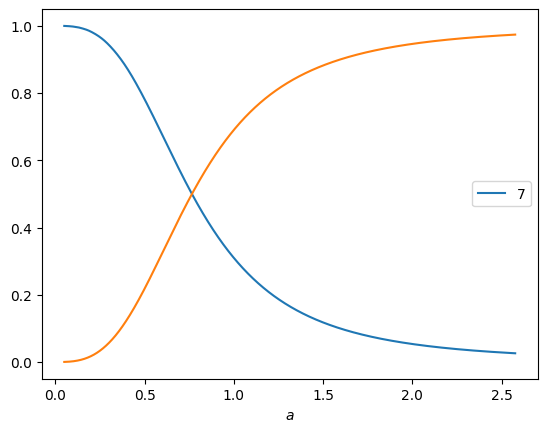

In [53]:
om(7)

Value of Om_m at for p =  -3 is 0.31143794487582965
Value of Om_p at for p =  -3 is 0.6885509759528041
Value of Om_m at for p =  -2 is 0.3110987585190174
Value of Om_p at for p =  -2 is 0.688892336925543
Value of Om_m at for p =  -1 is 0.310790213849237
Value of Om_p at for p =  -1 is 0.6892031918992243
Value of Om_m at for p =  0 is 0.31051226555243105
Value of Om_p at for p =  0 is 0.6894834279615281
Value of Om_m at for p =  1 is 0.31026491449332605
Value of Om_p at for p =  1 is 0.6897330392737456
Value of Om_m at for p =  2 is 0.3100481591769491
Value of Om_p at for p =  2 is 0.689952019792454
Value of Om_m at for p =  3 is 0.30986199524632924
Value of Om_p at for p =  3 is 0.690140362590701
Value of Om_m at for p =  4 is 0.30970641507482527
Value of Om_p at for p =  4 is 0.6902980586362912
Value of Om_m at for p =  5 is 0.309581460609146
Value of Om_p at for p =  5 is 0.69042522123241


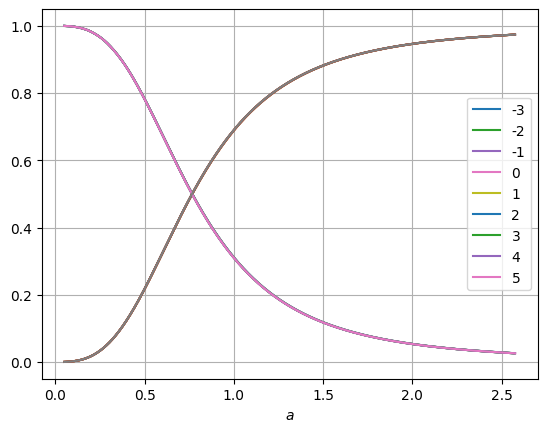

In [43]:

for i in range(-3,6):
    om(i)


plt.grid()


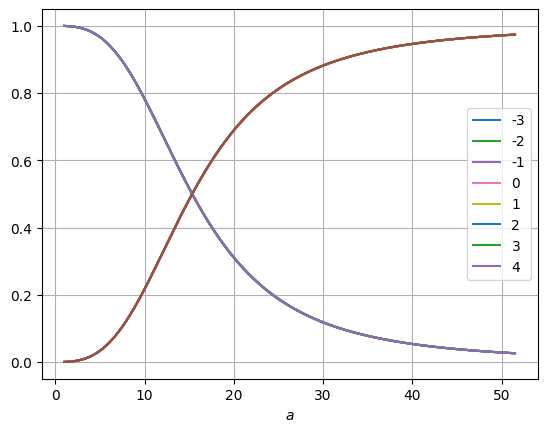

In [ ]:
for i in range(-3,5):
  m=i*10**(-1)
  omr(i)


plt.grid()

In [ ]:
a=np.array([5,1,2,3,10,4])
s=np.array([0,2,3,23,110,14])
print(np.where(a == 10)[0])
s[np.where(a == 1)[0][0]]

[4]


2